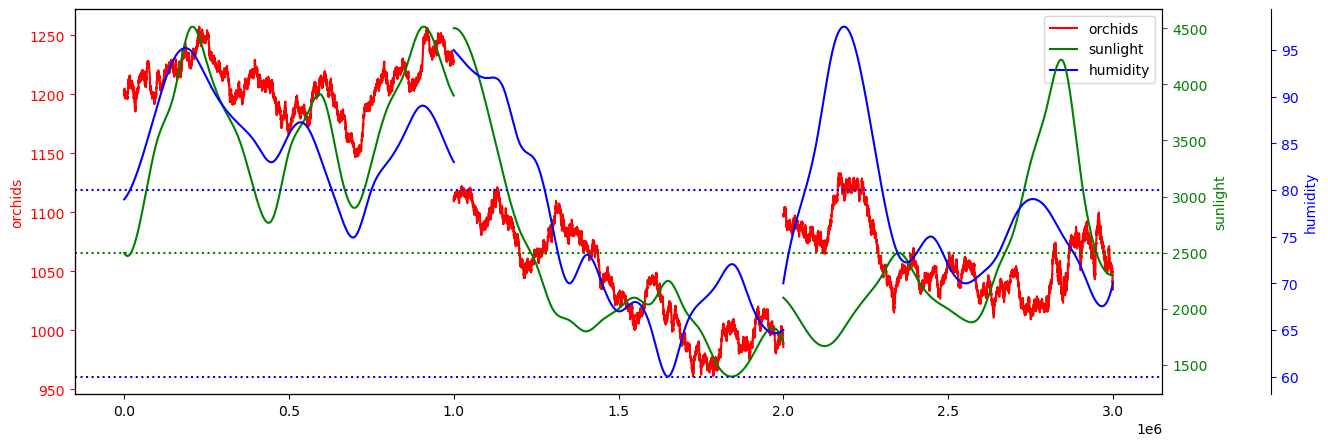

In [53]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import os
os.chdir('/Users/qianwang/Desktop/TradingChallenge')

filenames = ["codes/round_2/round-2-island-data-bottle/prices_round_2_day_-1.csv",
             "codes/round_2/round-2-island-data-bottle/prices_round_2_day_0.csv",
             "codes/round_2/round-2-island-data-bottle/prices_round_2_day_1.csv",]

sample_data = {}
for i, fname in enumerate(filenames):
    day = f"day_{i-1}"
    sample_data[day] = {} # day -1, 0, 1

    df = pd.read_csv(fname, sep=";")
    sample_data[day]["orchids"] = df["ORCHIDS"].to_numpy()
    sample_data[day]["sunlight"] = df["SUNLIGHT"].to_numpy()
    sample_data[day]["humidity"] = df["HUMIDITY"].to_numpy()

    if i == 0:
        sample_data[day]["timstamp"] = df["timestamp"].to_numpy()
    else:
        sample_data[day]["timstamp"] = df["timestamp"].to_numpy() + sample_data[f"day_{i-2}"]["timstamp"][-1] + 1

fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(right=0.85)
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin2.spines.right.set_position(("axes", 1.1))
colors = ["red", "green", "blue"]
axes = [ax, ax_twin1, ax_twin2]
p_list = []
for j, item in enumerate(["orchids", "sunlight", "humidity"]):
    for i in [-1, 0, 1]:
        p, = axes[j].plot(sample_data[f"day_{i}"]["timstamp"], sample_data[f"day_{i}"][item], color=colors[j], label=f"{item}")
    
    p_list.append(p)
    axes[j].yaxis.label.set_color(colors[j])
    axes[j].tick_params(axis='y', colors=colors[j])

ax_twin1.axhline(2500, linestyle=':', color=colors[1])
ax_twin2.axhline(60, linestyle=':', color=colors[2])
ax_twin2.axhline(80, linestyle=':', color=colors[2])

ax.set_ylabel("orchids")
ax_twin1.set_ylabel("sunlight")
ax_twin2.set_ylabel("humidity")

ax.legend(handles=p_list, loc="upper right")
plt.show()

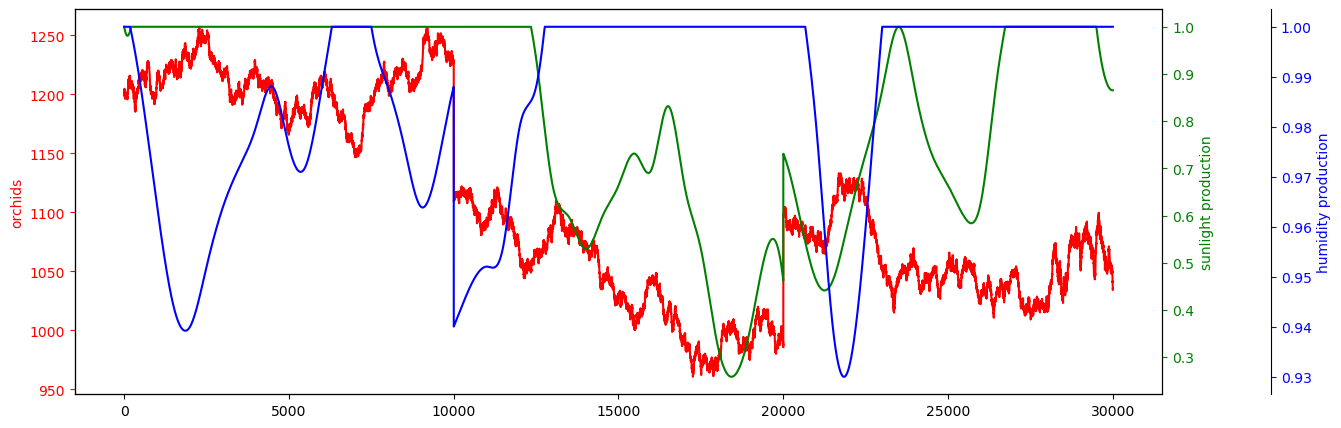

In [183]:
orchids = sample_data["day_-1"]["orchids"]
# orchids = np.append(orchids, sample_data["day_0"]["orchids"] + (sample_data["day_-1"]["orchids"][-1]-sample_data["day_0"]["orchids"][0]+2))
orchids = np.append(orchids, sample_data["day_0"]["orchids"])
orchids = np.append(orchids, sample_data["day_1"]["orchids"])

humidity = sample_data["day_-1"]["humidity"]
humidity = np.append(humidity, sample_data["day_0"]["humidity"])
humidity = np.append(humidity, sample_data["day_1"]["humidity"])

sunlight = sample_data["day_-1"]["sunlight"]
sunlight = np.append(sunlight, sample_data["day_0"]["sunlight"])
sunlight = np.append(sunlight, sample_data["day_1"]["sunlight"])

production_humidity = np.empty(humidity.shape)
humidity_low_limit = 60
humidity_high_limit = 80
for i, h in enumerate(humidity):
    if h < humidity_low_limit:
        production_humidity[i] = 1 - (humidity_low_limit-h) / 5 * 0.02
        # production_humidity[i] = np.exp((humidity_low_limit-h)/5*np.log(0.98))
    elif h > humidity_high_limit:
        production_humidity[i] = 1 - (h-humidity_high_limit) / 5 * 0.02
        # production_humidity[i] = np.exp((h-humidity_high_limit)/5*np.log(0.98))
    else:
        production_humidity[i] = 1
# production_humidity = np.cumsum(production_humidity) / np.arange(1, len(production_humidity)+1)

production_sunlight = np.empty(sunlight.shape)
sunlight_low_limit = 2500
for i, s in enumerate(sunlight):
    if s < sunlight_low_limit:
        production_sunlight[i] = 1 - (sunlight_low_limit-s) / 59.5 * 0.04
        # production_sunlight[i] = np.exp((sunlight_low_limit-s)/59.5*np.log(0.96))
    else:
        production_sunlight[i] = 1
# production_sunlight = np.cumsum(production_sunlight) / np.arange(1, len(production_sunlight)+1)

production = production_humidity * production_sunlight

colors = ["red", "green", "blue"]
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(right=0.85)
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin2.spines.right.set_position(("axes", 1.1))
axes = [ax, ax_twin1, ax_twin2]
ax.plot(orchids, color=colors[0])
ax_twin1.plot(production_sunlight, color=colors[1])
ax_twin2.plot(production_humidity, color=colors[2])

# ax_twin1.set_ylim(ax.get_ylim())

for i, axi in enumerate(axes):
    axi.yaxis.label.set_color(colors[i])
    axi.tick_params(axis='y', colors=colors[i])

ax.set_ylabel("orchids")
ax_twin1.set_ylabel("sunlight production")
ax_twin2.set_ylabel("humidity production")

plt.show()


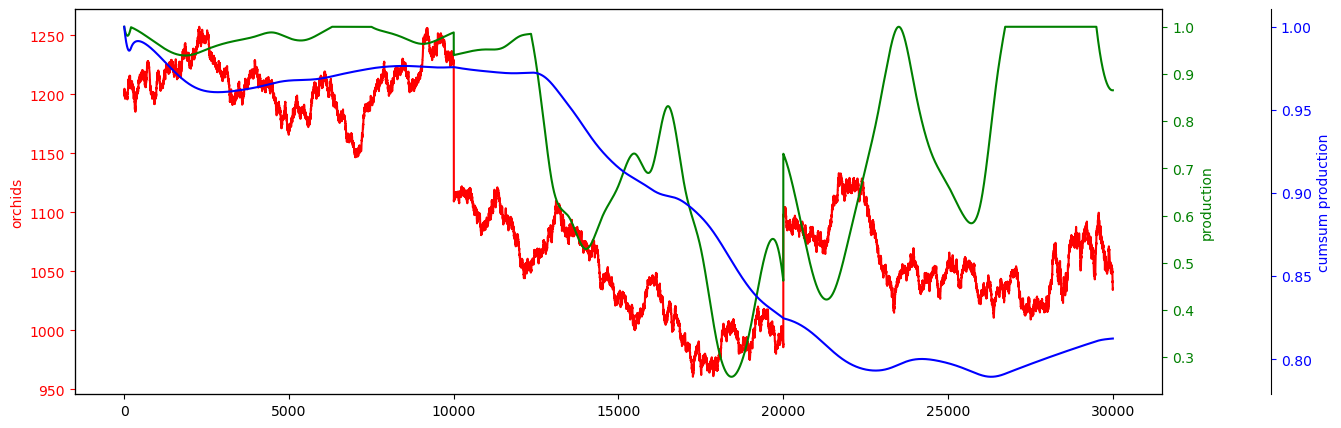

In [184]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(right=0.85)
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin2.spines.right.set_position(("axes", 1.1))
axes = [ax, ax_twin1, ax_twin2]
ax.plot(orchids, color=colors[0])
# ax_twin1.plot(production_sunlight, color=colors[1])
# ax_twin2.plot(production_humidity, color=colors[2])

ax_twin1.plot(production, color=colors[1])
ax_twin2.plot(np.cumsum(production)/np.arange(1, len(production)+1), color=colors[2])

# ax_twin1.set_ylim(ax.get_ylim())

for i, axi in enumerate(axes):
    axi.yaxis.label.set_color(colors[i])
    axi.tick_params(axis='y', colors=colors[i])

ax.set_ylabel("orchids")
ax_twin1.set_ylabel("production")
ax_twin2.set_ylabel("cumsum production")

plt.show()

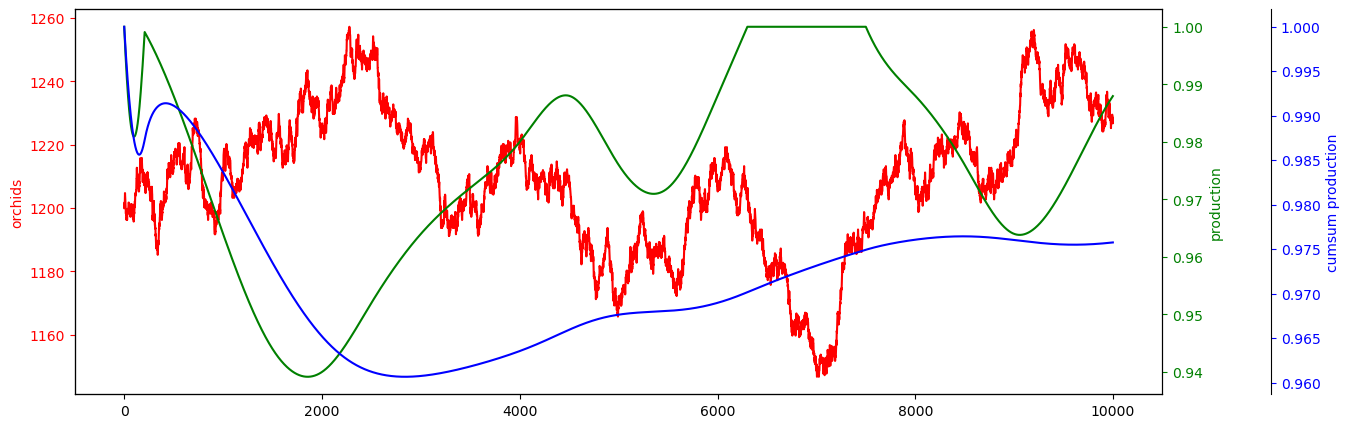

In [185]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(right=0.85)
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin2.spines.right.set_position(("axes", 1.1))
axes = [ax, ax_twin1, ax_twin2]
ax.plot(orchids[:9999], color=colors[0])
# ax_twin1.plot(production_sunlight, color=colors[1])
# ax_twin2.plot(production_humidity, color=colors[2])

ax_twin1.plot(production[:9999], color=colors[1])
ax_twin2.plot(np.cumsum(production[:9999])/np.arange(1, len(production[:9999])+1), color=colors[2])

# ax_twin1.set_ylim(ax.get_ylim())

for i, axi in enumerate(axes):
    axi.yaxis.label.set_color(colors[i])
    axi.tick_params(axis='y', colors=colors[i])

ax.set_ylabel("orchids")
ax_twin1.set_ylabel("production")
ax_twin2.set_ylabel("cumsum production")

plt.show()

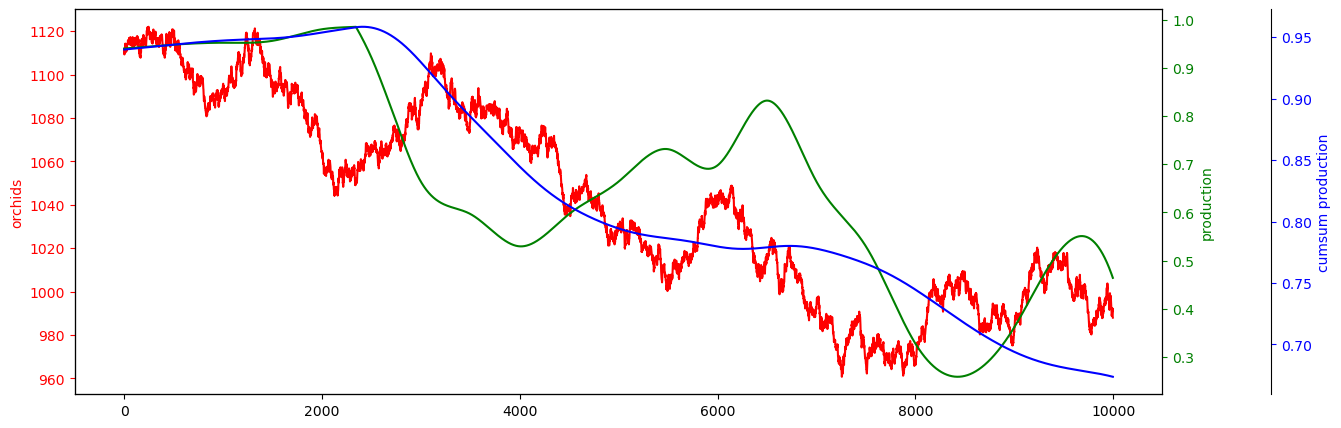

In [186]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(right=0.85)
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin2.spines.right.set_position(("axes", 1.1))
axes = [ax, ax_twin1, ax_twin2]
ax.plot(orchids[10002:19999], color=colors[0])
# ax_twin1.plot(production_sunlight, color=colors[1])
# ax_twin2.plot(production_humidity, color=colors[2])

ax_twin1.plot(production[10002:19999], color=colors[1])
ax_twin2.plot(np.cumsum(production[10002:19999])/np.arange(1, len(production[10002:19999])+1), color=colors[2])

# ax_twin1.set_ylim(ax.get_ylim())

for i, axi in enumerate(axes):
    axi.yaxis.label.set_color(colors[i])
    axi.tick_params(axis='y', colors=colors[i])

ax.set_ylabel("orchids")
ax_twin1.set_ylabel("production")
ax_twin2.set_ylabel("cumsum production")

plt.show()

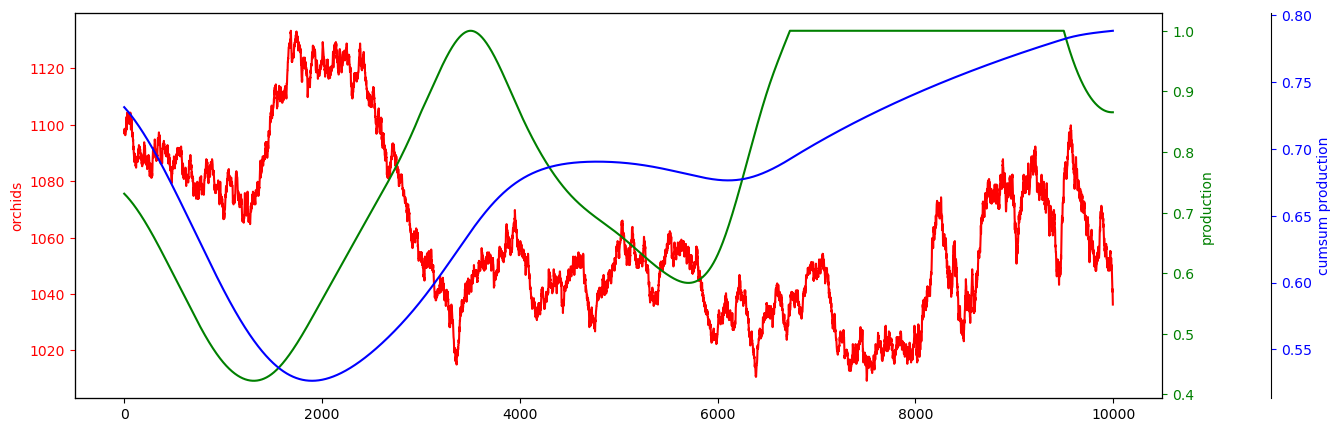

In [187]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(right=0.85)
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin2.spines.right.set_position(("axes", 1.1))
axes = [ax, ax_twin1, ax_twin2]
ax.plot(orchids[20002:29999], color=colors[0])
# ax_twin1.plot(production_sunlight, color=colors[1])
# ax_twin2.plot(production_humidity, color=colors[2])

ax_twin1.plot(production[20002:29999], color=colors[1])
ax_twin2.plot(np.cumsum(production[20002:29999])/np.arange(1, len(production[20002:29999])+1), color=colors[2])

# ax_twin1.set_ylim(ax.get_ylim())

for i, axi in enumerate(axes):
    axi.yaxis.label.set_color(colors[i])
    axi.tick_params(axis='y', colors=colors[i])

ax.set_ylabel("orchids")
ax_twin1.set_ylabel("production")
ax_twin2.set_ylabel("cumsum production")

plt.show()

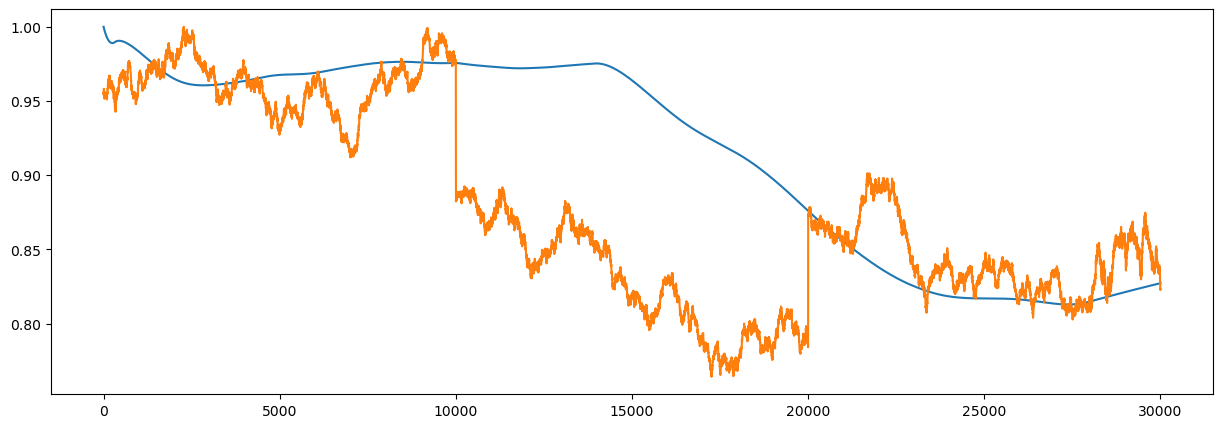

In [188]:
sunlight_ave = np.empty(sunlight.shape)
window_size = int(5833/2)
sunlight_ave[:window_size] = np.cumsum(sunlight[:window_size]) / np.arange(1, window_size+1)
sunlight_ave[window_size:] = (np.cumsum(sunlight)[window_size:] - np.cumsum(sunlight[:-window_size])) / window_size

production_sunlight_ave = np.empty(sunlight.shape)
sunlight_low_limit = 2500
for i, s in enumerate(sunlight_ave):
    if s < sunlight_low_limit:
        production_sunlight_ave[i] = 1 - (sunlight_low_limit-s) / 60 * 0.04
    else:
        production_sunlight_ave[i] = 1
# production_sunlight_ave = np.cumsum(production_sunlight_ave) / np.arange(1, len(production_sunlight_ave)+1)

production = production_sunlight_ave * production_humidity
production_cumsum = np.cumsum(production) / np.arange(1, len(production)+1)

fig = plt.figure(figsize=(15, 5))
# orchids_norm = orchids/(np.cumsum(production_sunlight_ave*production_humidity)/np.arange(1, len(production_sunlight_ave)+1))
# plt.plot(production_sunlight_ave*production_humidity)
# plt.plot(production_sunlight_ave*production_humidity)
plt.plot(production_cumsum)
plt.plot(orchids/max(orchids))
# plt.plot(sunlight_ave)
plt.show()

In [102]:
np.mean(sunlight)

2777.073279015432

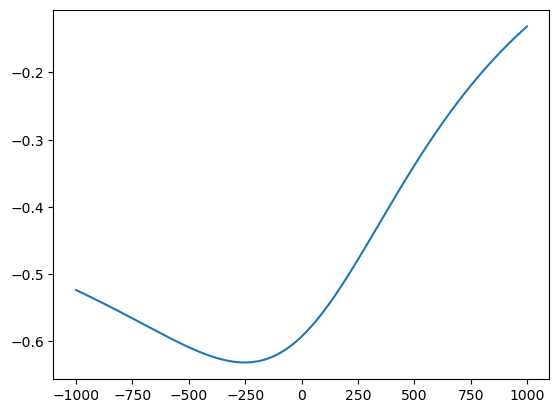

In [207]:
# np.corrcoef(orchids, np.cumsum(production_humidity) / np.arange(1, len(production_humidity)+1))
# np.corrcoef(np.cumsum(orchids) / np.arange(1, len(orchids)+1), production_humidity)

orchids_data = {"orchids sum": (np.cumsum(orchids) / np.arange(1, len(orchids)+1))[1:9999],
                "orchids original": orchids[1:9999],
                "orchids diff": np.diff(orchids)[:9998],
                }

humidity_data = {"humidity sum": (np.cumsum(humidity) / np.arange(1, len(humidity)+1))[1:9999],
                "humidity original": humidity[1:9999],
                "humidity diff": np.diff(humidity)[:9998],
                }

production_humidity_data = {"production_humidity sum": (np.cumsum(production_humidity) / np.arange(1, len(production_humidity)+1))[1:9999],
                "production_humidity original": production_humidity[1:9999],
                "production_humidity diff": np.diff(production_humidity)[:9998],
                }

sunlight_data = {"sunlight sum": (np.cumsum(sunlight) / np.arange(1, len(sunlight)+1))[1:],
                "sunlight original": sunlight[1:],
                "sunlight diff": np.diff(sunlight),
                }

production_sunlight_data = {"production_sunlight sum": (np.cumsum(production_sunlight) / np.arange(1, len(production_sunlight)+1))[1:],
                "production_sunlight original": production_sunlight[1:],
                "production_sunlight diff": np.diff(production_sunlight),
                }

production_data = {"production sum": (np.cumsum(production) / np.arange(1, len(production)+1))[1:],
                "production original": production[1:],
                "production diff": np.diff(production),
                }
# for o_name, o in orchids_data.items():
#     for h_name, h in humidity_data.items():
#         print(f"{o_name}, {h_name}: {np.corrcoef(o, h)[0,1]:.2f}")

a_list = []
i_list = np.arange(-1000, 1000)
for i in i_list:
    a = np.corrcoef(orchids_data["orchids original"], i*production_humidity_data["production_humidity diff"]+production_humidity_data["production_humidity original"])[0, 1]
    a_list.append(a)

plt.plot(i_list, a_list)
plt.show()
# print("\n")

# for o_name, o in orchids_data.items():
#     for s_name, s in sunlight_data.items():
#         print(f"{o_name}, {s_name}: {np.corrcoef(o, s)[0,1]:.2f}")

# for o_name, o in orchids_data.items():
#     for h_name, h in production_humidity_data.items():
#         print(f"{o_name}, {h_name}: {np.corrcoef(o, h)[0,1]:.2f}")

# print("\n")

# for o_name, o in orchids_data.items():
#     for s_name, s in production_sunlight_data.items():
#         print(f"{o_name}, {s_name}: {np.corrcoef(o, s)[0,1]:.2f}")

# print("\n")

# for o_name, o in orchids_data.items():
#     for p_name, p in production_data.items():
#         print(f"{o_name}, {p_name}: {np.corrcoef(o, p)[0,1]:.2f}")

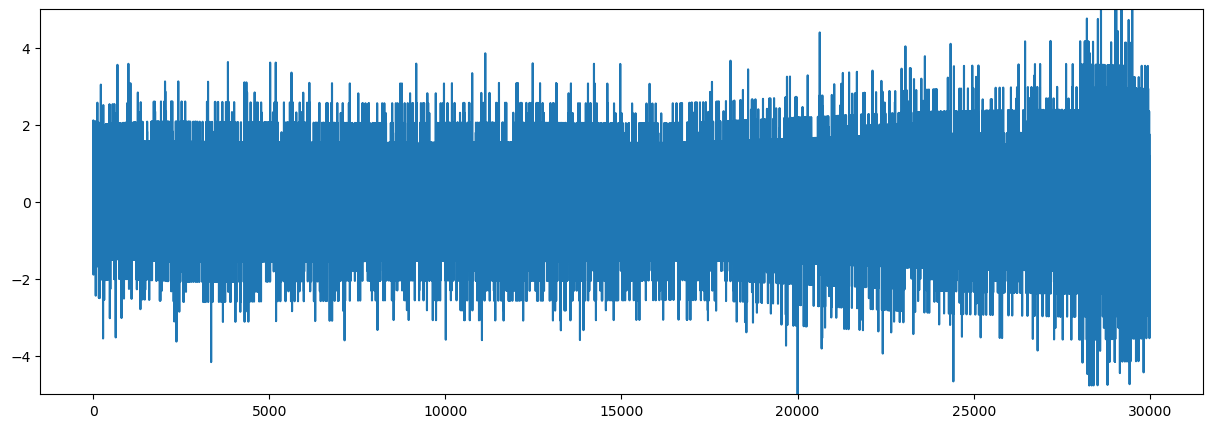

In [94]:
plt.figure(figsize=(15, 5))
plt.plot(np.diff(orchids_norm), label="orchids")
plt.ylim(-5, 5)
plt.show()

In [173]:
adfuller(orchids[20003:29999])

(-3.254320900891835,
 0.017047961776261115,
 0,
 9997,
 {'1%': -3.431004294278137,
  '5%': -2.861829159140512,
  '10%': -2.5669239142727114},
 30192.39412803892)

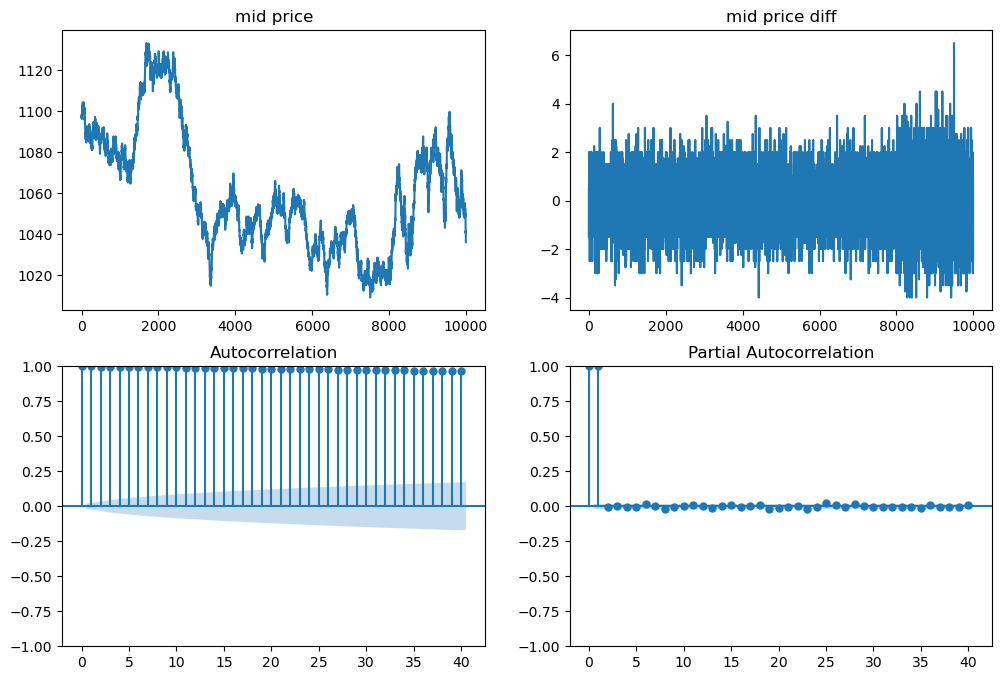

In [175]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(orchids[20003:29999])
axes[0, 0].set_title('mid price')

orchids_diff = np.diff(orchids[20003:29999])
axes[0, 1].plot(orchids_diff)
axes[0, 1].set_title('mid price diff')

# plot_acf(orchids_diff, ax=axes[1, 0])
# plot_pacf(orchids_diff, ax=axes[1, 1])

plot_acf(orchids[20003:29999], ax=axes[1, 0])
plot_pacf(orchids[20003:29999], ax=axes[1, 1])

plt.show()

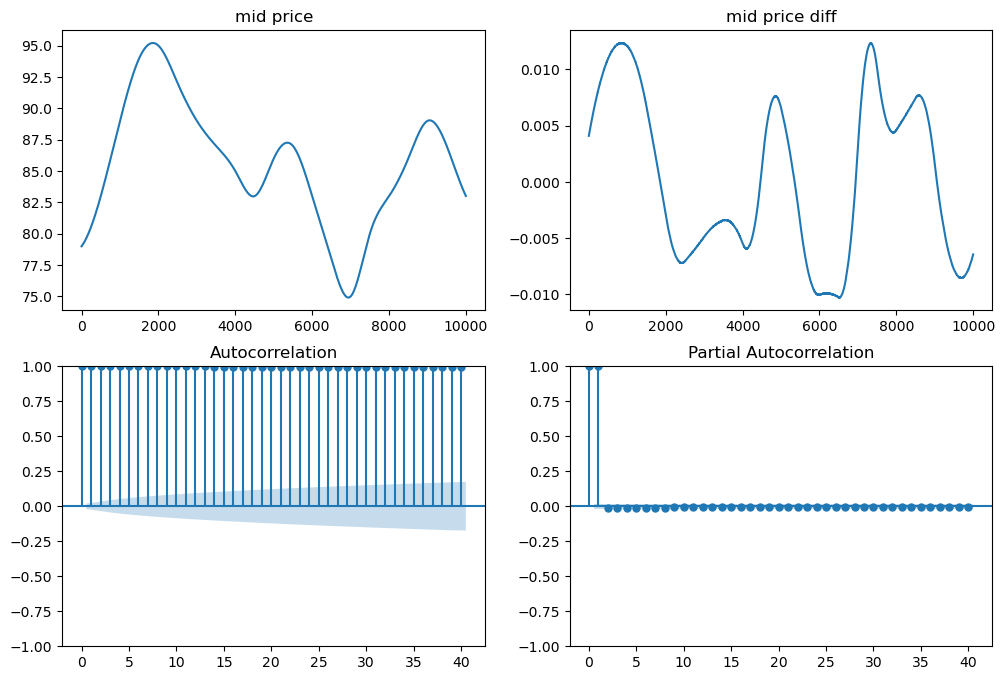

In [117]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(humidity[:9999])
axes[0, 0].set_title('mid price')

humidity_diff = np.diff(humidity[:9999])
axes[0, 1].plot(humidity_diff)
axes[0, 1].set_title('mid price diff')

plot_acf(humidity[:9999], ax=axes[1, 0])
plot_pacf(humidity[:9999], ax=axes[1, 1])

plt.show()

In [181]:
model = ARIMA(orchids[20003:29999]-orchids[20003], order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9996
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -15152.793
Date:                Sun, 14 Apr 2024   AIC                          30311.586
Time:                        22:31:45   BIC                          30333.216
Sample:                             0   HQIC                         30318.908
                               - 9996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4460     12.022     -3.115      0.002     -61.008     -13.884
ar.L1          0.9992      0.000   2510.580      0.000       0.998       1.000
sigma2         1.2132      0.015     79.141      0.0

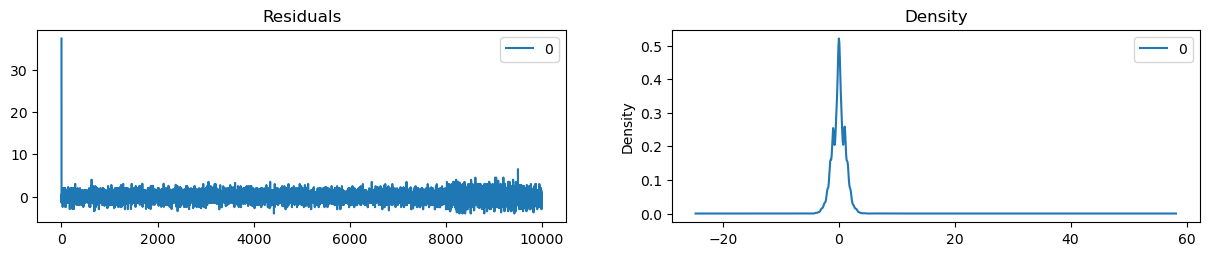

In [182]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15, 2.5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

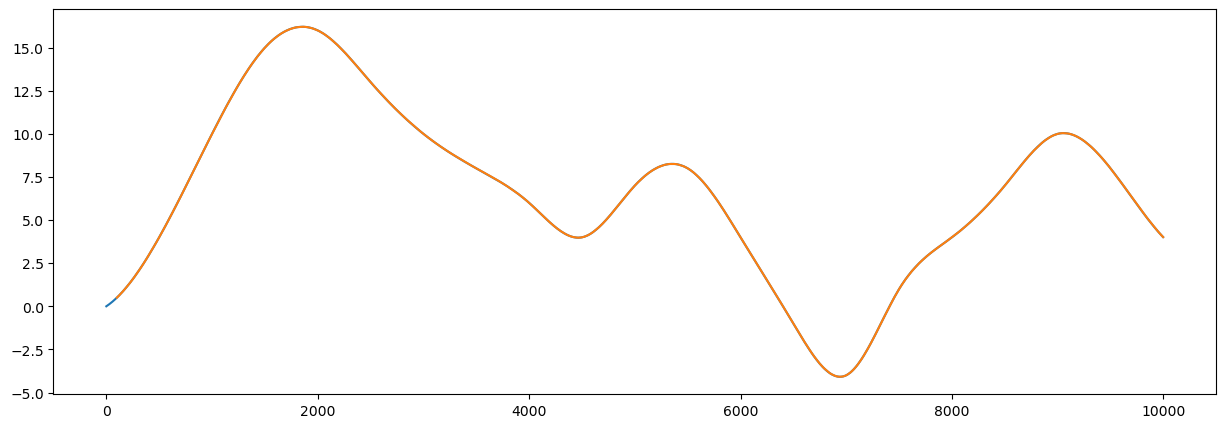

In [136]:
fig, ax = plt.subplots(figsize=(15,5))
# ax = mid_price.plot(ax=ax)
plt.plot(np.arange(9999), humidity[:9999] - humidity[0])
plt.plot(np.arange(100, 9999), model_fit.predict(100, 9998, dynamic=False))
plt.show()